# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [3]:
workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104693 entries, 0 to 104692
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   workout_id             104693 non-null  int64         
 1   cost                   100012 non-null  float64       
 2   start_at               104693 non-null  datetime64[ns]
 3   status                 104693 non-null  object        
 4   workout_schedule_type  104693 non-null  object        
 5   client_id              104693 non-null  int64         
 6   client_status          100362 non-null  object        
 7   workout_type           104693 non-null  object        
 8   trainer_department     104676 non-null  object        
 9   trainer_id             104693 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 8.0+ MB


1. Посмотрев данные, мы обнаружили пропуски в столбцах **cost**,**client_status** и **trainer_department**.
2. Если подробно рассмотри таблицу, то увидим, что пропущеные значения в столбцах **cost** и **client_status** можно заполнить 0 и 'first workout' соответственно, а **trainer_department** 'unknown'

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   first_contact_datetime  4273 non-null   object        
 1   age                     2281 non-null   float64       
 2   free_workout_datetime   2886 non-null   object        
 3   first_payment_datetime  4273 non-null   datetime64[ns]
 4   workouts_successful     4273 non-null   int64         
 5   workouts_total          4273 non-null   int64         
 6   months_active           4273 non-null   int64         
 7   user_id                 4273 non-null   int64         
 8   region                  3672 non-null   object        
 9   geo_group               4273 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 334.0+ KB


In [5]:
users['age'].describe()

count    2281.000000
mean       26.205612
std         8.859393
min         4.000000
25%        20.000000
50%        26.000000
75%        32.000000
max        68.000000
Name: age, dtype: float64

1. Посмотрев данные, мы обнаружили пропуски в столбцах **age**,**free_workout_datetime** и **region**.
2. Если подробно рассмотрим таблицу, то увидим, что пропущеные значения в столбцах **free_workout_datetime** и **region** можно заполнить 0 и 'unknown' соответственно. В столбцуе **age**, составим портрет среднестатистического клиента и получим возраст 26 лет.

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом `workouts`.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [6]:
workouts['day_week'] = workouts['start_at'].astype('datetime64[D]')

In [7]:
success_work = workouts.query('status == "success"')

In [8]:
success_work

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id,day_week
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051,2020-11-13
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642,2020-11-21
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642,2020-11-28
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642,2020-12-05
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530,2020-08-06
...,...,...,...,...,...,...,...,...,...,...,...
104688,30976738,750.0,2020-11-19 08:00:00,success,single,4831015,active,general,Spartacus,6684752,2020-11-19
104689,31118199,750.0,2020-11-21 11:00:00,success,regular,4831015,active,general,Spartacus,6684752,2020-11-21
104690,31118238,750.0,2020-11-26 08:00:00,success,single,4831015,active,general,Spartacus,6684752,2020-11-26
104691,31600293,750.0,2020-12-03 08:00:00,success,regular,4831015,active,general,Spartacus,6684752,2020-12-03


In [9]:
trainings_by_day = success_work.groupby('day_week').agg({'status':'count'}).sort_values(by='day_week')

Text(0.5, 1.0, 'Количество тренировок за каждый день')

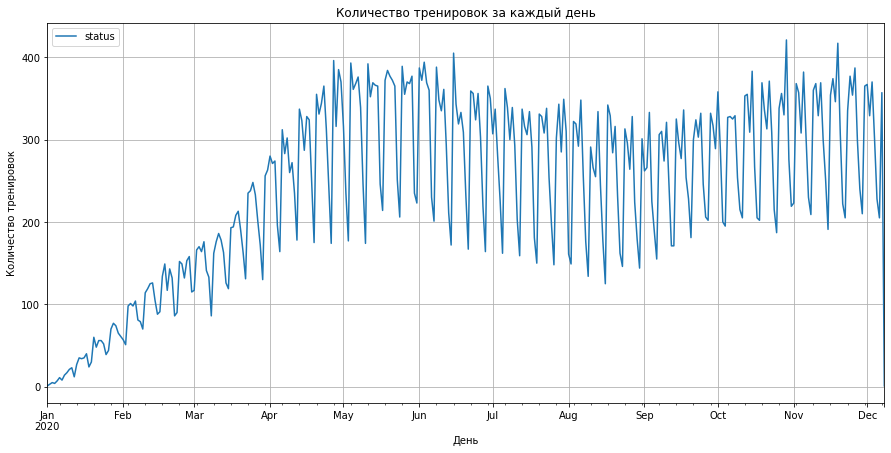

In [10]:
trainings_by_day.plot(grid=True, figsize=(15,7))

plt.ylabel("Количество тренировок")
plt.xlabel("День")
plt.title("Количество тренировок за каждый день")

#### Вывод:
- На графике видно, что рост количества тренировок наблюдается с апреля по май и продолжается до декабря.
- В последний день декабря количество посещений упало до 1. Возможно перестали собирать данные. 

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [11]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [12]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [13]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer.head()

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8


In [14]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

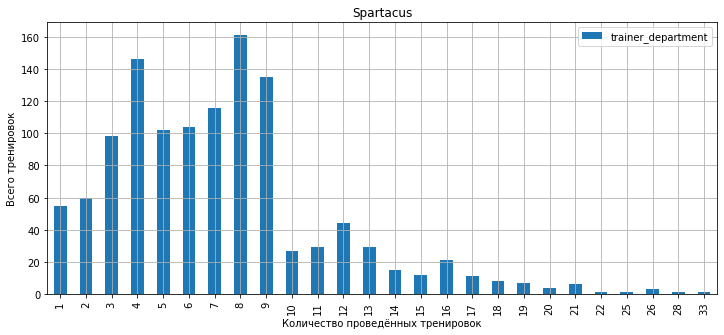

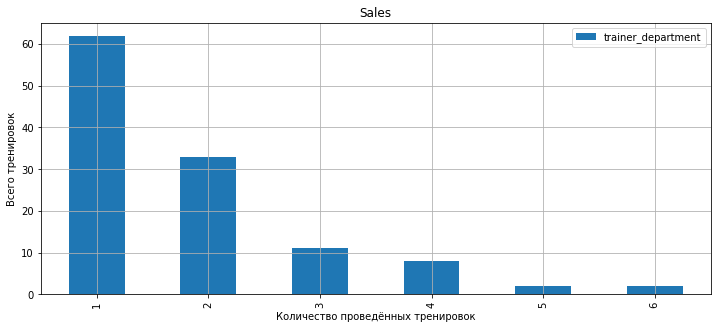

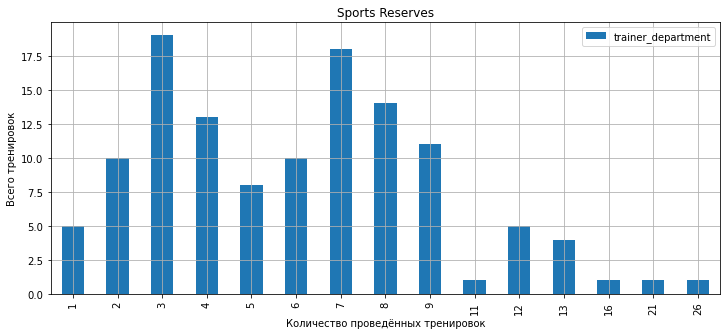

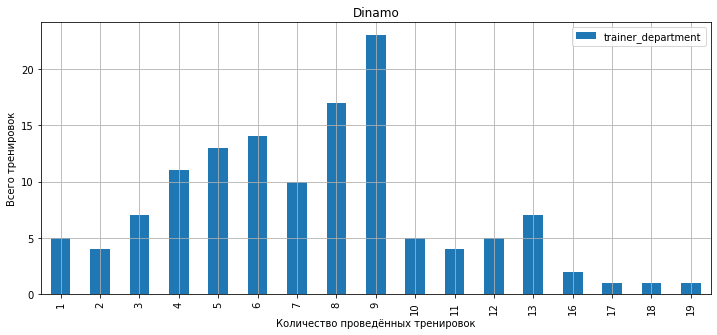

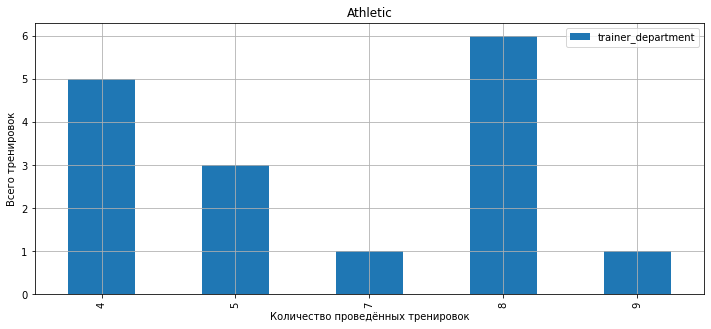

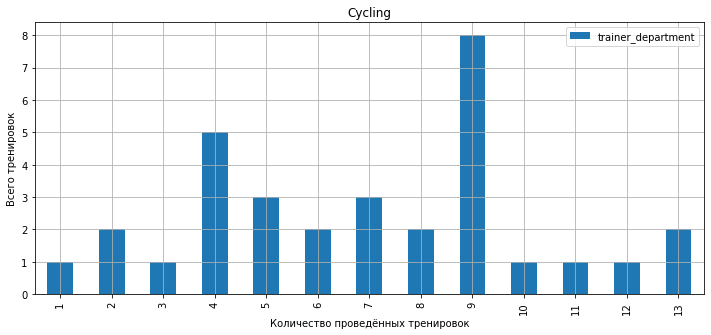

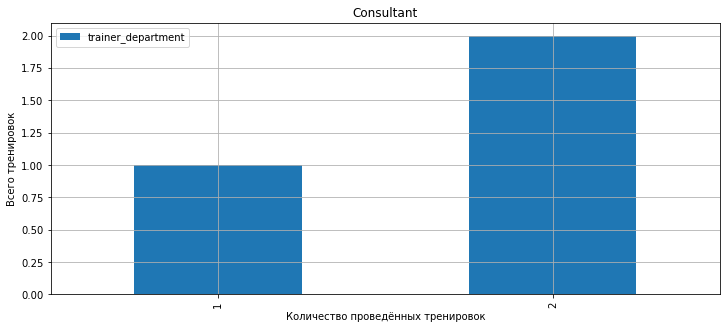

In [15]:
for x in workouts_by_trainer['trainer_department'].unique():
    t = workouts_by_trainer.query(f'trainer_department == "{x}"')
    s = t.groupby('workouts').agg({'trainer_department':'count'}).reset_index()
    s.plot(x='workouts', y='trainer_department',  kind='bar', grid=True, figsize=(12,5))
    plt.ylabel("Всего тренировок")
    plt.xlabel("Количество проведённых тренировок")
    plt.title(f"{x}")
    plt.show()

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

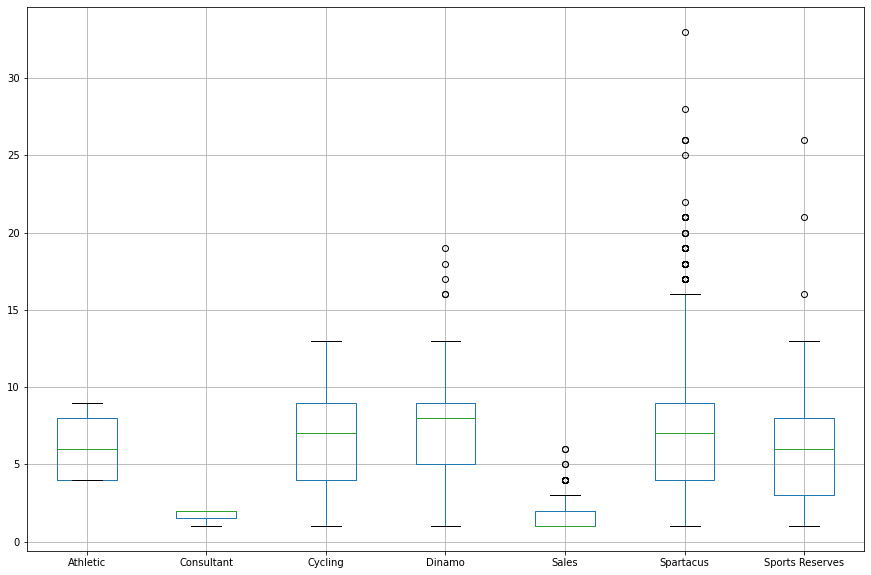

In [16]:
workouts_by_trainer.pivot_table(
    index='trainer_id',
    columns='trainer_department',
    values='workouts',
    aggfunc='mean').boxplot(figsize=(15,10),
                           grid=True)

#### Вывод:
- В департаментах **Consultant** и **Sales** самое низкое среднее количество тренеровок.
- В среднем в департаментах **Athletic**, **Cycling**, **Dinamo**, **Spartacus**, **Sports Reserves** больше перегруженных тренеров.

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [17]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


In [18]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby('cost')['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

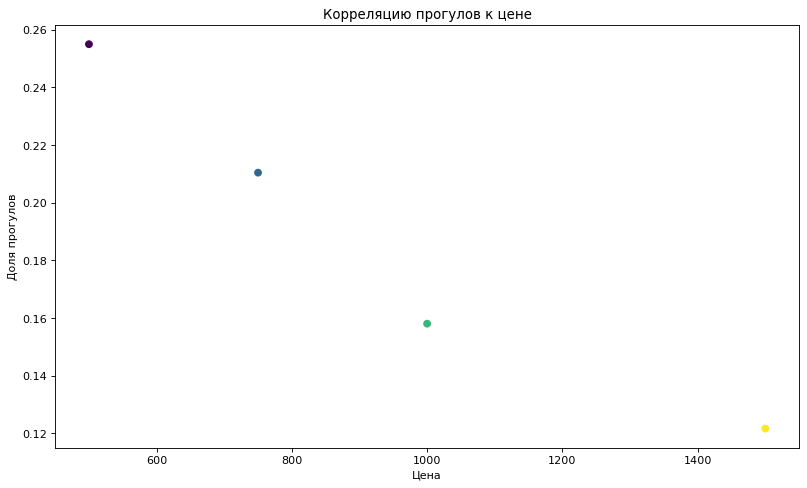

In [19]:
x = cost_age_data_agg['cost']
y = cost_age_data_agg['status']
t = np.arange(4)

plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(x, y, c=t, )
plt.ylabel("Доля прогулов")
plt.xlabel("Цена")
plt.title("Корреляцию прогулов к цене")
plt.show()

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

In [20]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby('age')['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

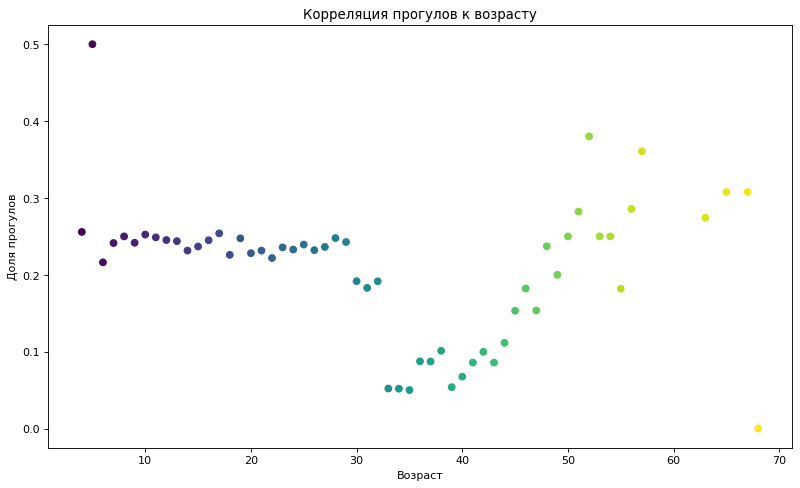

In [21]:
x = cost_age_data_agg['age']
y = cost_age_data_agg['status']
t = np.arange(58)

plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(x, y, c=t, )
plt.ylabel("Доля прогулов")
plt.xlabel("Возраст")
plt.title("Корреляция прогулов к возрасту")
plt.show()

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
          

In [22]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


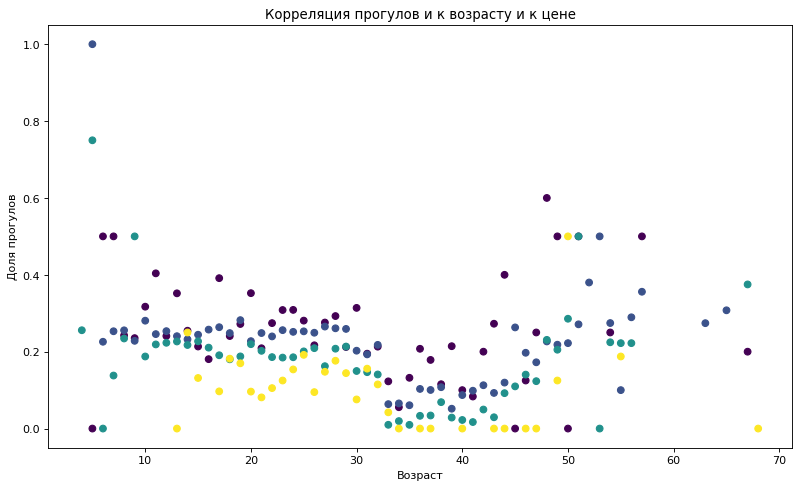

In [23]:
x = cost_age_data_agg['age']
y = cost_age_data_agg['status']
price_color = cost_age_data_agg['cost']

plt.figure(figsize=(12, 7), dpi=80)
plt.scatter(x, y, c=price_color, )
plt.ylabel("Доля прогулов")
plt.xlabel("Возраст")
plt.title("Корреляция прогулов и к возрасту и к цене")
plt.show()

## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [24]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [25]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217
4,500,36-40,0.175573
5,500,41-45,0.191489
6,500,46-50,0.285714
7,500,50+,0.307692
8,750,0-20,0.249445
9,750,21-25,0.250124


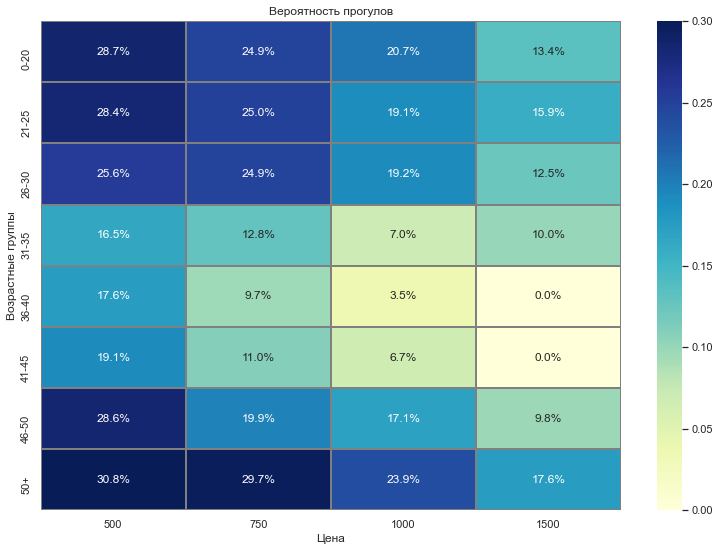

In [26]:
heatmap = cost_age_data_agg.pivot_table(
    index='age_bin',
    columns='cost',
    values='status',
    aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
sns.heatmap(heatmap, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.3, cmap="YlGnBu")
plt.ylabel("Возрастные группы")
plt.xlabel("Цена")
plt.title('Вероятность прогулов')
plt.show()

#### Вывод:
- Самая высокая вероятность прогулов где стоимость занятия равна 500 у.е. Самая низкая где стоимость занятия равна 1500 у.е
- Можно увидеть, что возрастные гурппы от 31 до 45 имеют меньше вероятности прогула тренировок относительно других групп.

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [27]:
trainings_by_day = success_work.groupby('day_week').agg({'status':'count'})
trainings_by_day # посмотрим, в каком формате лежат нужные данные

,status
day_week,
2020-01-01,1
2020-01-02,3
2020-01-03,5
2020-01-04,4
2020-01-05,7
...,...
2020-12-04,301
2020-12-05,228
2020-12-06,205


In [28]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,3,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,4,5,Saturday
4,2020-01-05,7,6,Sunday
...,...,...,...,...
338,2020-12-04,301,4,Friday
339,2020-12-05,228,5,Saturday
340,2020-12-06,205,6,Sunday
341,2020-12-07,357,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [29]:
trainings_by_day_frame['week_day_num'] += 1

In [30]:
final = trainings_by_day_frame.groupby(
    'week_day_num').agg({'workouts':'mean'}).reset_index()

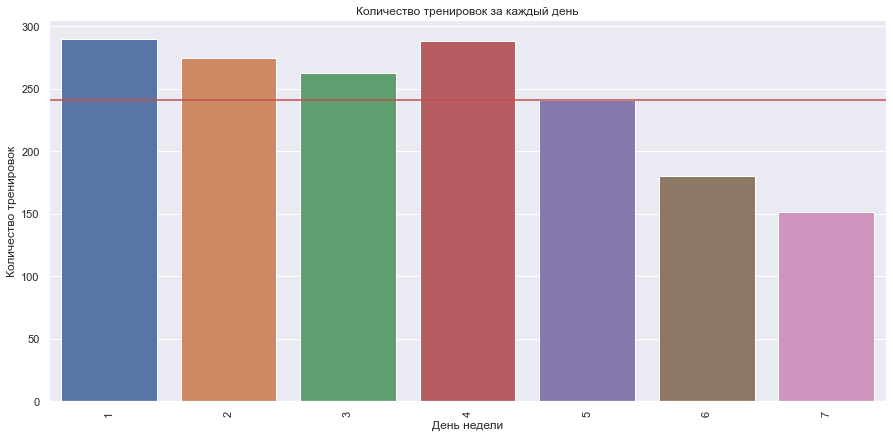

In [31]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15, 7)
fig = sns.barplot(x='week_day_num', y='workouts', data=final)

fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set_xlabel("День недели")
fig.set_ylabel("Количество тренировок")
plt.title("Количество тренировок за каждый день")
sns.despine()
plt.axhline(y = trainings_by_day_frame['workouts'].mean(), color = 'r', linestyle = '-') 
plt.show()

#### Вывод:
- Во вторник и среду мы наблюдаем плавное снижение активности относительно понедельника, но после среды виден скачок посещений.
- После четверга наблюдается резкое понижение активности клиентов, спад происходит до воскресенья. 
- Понедельник и четверг являются самыми популярными днями для посещения спортзала.
- P.s. если рассматривать данные относительно каждого дня из месяца, то график будет не читаем.

# 🎉🎉🎉 Поздравляем, ты великолепен! 